In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.basemap import Basemap
import xarray as xr
import math
import time
from skimage.morphology import binary_erosion
import matplotlib.colors as mcolors

In [2]:
data = xr.open_dataset('med-hcmr-wav-an-fc-h_1637573239403.nc')  # wave height 22 november
data_stat = xr.open_dataset('MED-MFC_006_017_mask_bathy.nc')
lats = data.variables['latitude'][:]
lons = data.variables['longitude'][:]
time = data.variables['time'][:]
wave = data.variables['VHM0'][:]
mask = data_stat.variables['mask'][0,:,:]
print(data)
print("------------------------------------------------------")
print(mask)

<xarray.Dataset>
Dimensions:    (latitude: 380, time: 24, longitude: 1307)
Coordinates:
  * latitude   (latitude) float32 30.19 30.23 30.27 30.31 ... 45.9 45.94 45.98
  * time       (time) datetime64[ns] 2021-11-22 ... 2021-11-22T23:00:00
  * longitude  (longitude) float32 -18.12 -18.08 -18.04 ... 36.21 36.25 36.29
Data variables:
    VHM0       (time, latitude, longitude) float32 ...
Attributes: (12/15)
    bulletin_type:                   forecast
    institution:                     Hellenic Centre for Marine Research (HCM...
    source:                          MEDWAM3
    credit:                          Copernicus Marine Environment Monitoring...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    producer:                        CMEMS-MED Monitoring and Forecasting Centre
    ...                              ...
    area:                            MED
    bulletin_date:                   2021-11-21 12
    FROM_ORIGINAL_FILE__field_type:  hourly_instanta

<ipython-input-3-9e1f8da80dc6>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme = mp.pcolor(x, y, wave[0], cmap='jet')


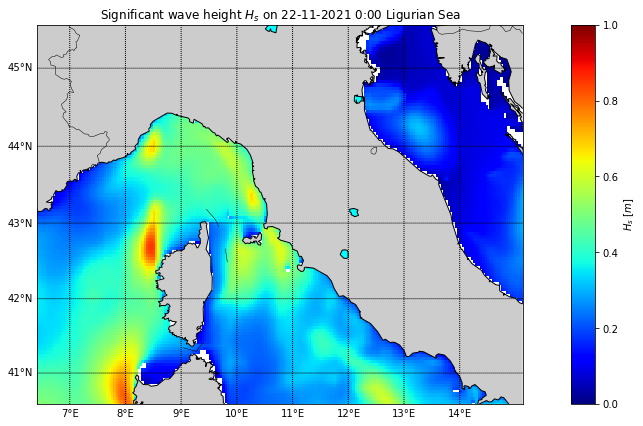

In [3]:
plt.figure(1, figsize=(10, 7))
mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i')

             
lon, lat = np.meshgrid(lons, lats)
x, y = mp(lon, lat)

c_scheme = mp.pcolor(x, y, wave[0], cmap='jet')
#plt.scatter(50000, 0, linewidth=10, marker='o', color='white')
mp.fillcontinents(lake_color='aqua')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
mp.drawmeridians(np.arange(6,15,1.0),labels=[0,0,0,1]) #longitudes
mp.drawparallels(np.arange(40,46,1.0),labels=[1,0,0,0]) #latitudes
cbar = mp.colorbar(c_scheme, location='right', pad='10%')
plt.clim(0, 1)
cbar.set_label('$H_s$ $[m]$')

plt.title('Significant wave height $H_s$ on 22-11-2021 0:00 Ligurian Sea')
plt.show()

#### Defining area not safe

<ipython-input-4-885b8f0cee52>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mp.pcolor(x, y, contour_raw_meteo[0], cmap=ListedColormap(['white', 'red']))
<ipython-input-4-885b8f0cee52>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mp.pcolor(x, y, contour_raw_meteo[1], cmap=ListedColormap(['white', 'red']))
<ipython-input-4-885b8f0cee52>:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3

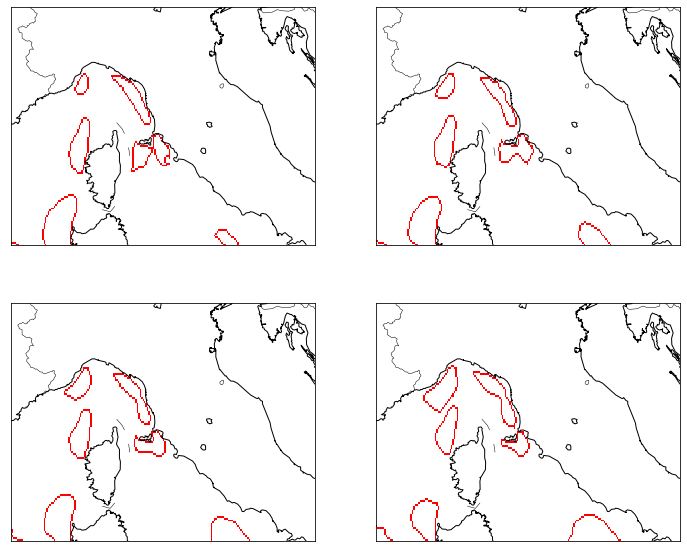

In [4]:
l = 5 
cost = np.zeros_like(wave[:l])
contour_raw_meteo = np.zeros_like(wave[:l])
for i in range(l):
    cost[i] = 100 * (np.array(wave[i]) >0.5) # + 100 * (np.array(data.VHM0[0]) != (np.array(data.VHM0[0])))
    contour_raw_meteo[i]=np.logical_xor(cost[i],binary_erosion(cost[i]))
    
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[0][0])
#c_scheme = mp.pcolor(x, y, cost[0], cmap=ListedColormap(['white', 'red']))
mp.pcolor(x, y, contour_raw_meteo[0], cmap=ListedColormap(['white', 'red']))
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[0][1])
mp.pcolor(x, y, contour_raw_meteo[1], cmap=ListedColormap(['white', 'red']))
#c_scheme1 = mp.pcolor(x, y, cost[1], cmap=ListedColormap(['white', 'red']))
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[1][0])

#c_scheme1 = mp.pcolor(x, y, cost[2], cmap=ListedColormap(['white', 'red']))
mp.pcolor(x, y, contour_raw_meteo[2], cmap=ListedColormap(['white', 'red']))
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[1][1])
mp.pcolor(x, y, contour_raw_meteo[3], cmap=ListedColormap(['white', 'red']))
#c_scheme1 = mp.pcolor(x, y, cost[3], cmap=ListedColormap(['white', 'red']))
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

plt.show()

In [5]:
contour_raw_land=np.logical_xor(mask,binary_erosion(mask)) 

### Build a grid structure

In [6]:
x_min, y_min = mp(8.958334, 41.354168)    # lons.values[650], lats.values[268] 
x_max, y_max = mp(11.500001, 43.270832)   # lons.values[711], lats.values[314]
print("x_min = {}, y_min = {}\nx_max = {}, y_max = {}".format(x_min, y_min, x_max, y_max))

lons.values[680]-lons.values[679]

x_min = 282249.730022532, y_min = 114007.03369052801
x_max = 564870.0725610546, y_max = 402247.96147155575


0.04166603

In [7]:
oxland, oyland = [], []
x_obsl, y_obsl = [], []
Cspacex, Cspacey = [], []
oxmeteo, oymeteo = [[] for i in range(l)], [[] for i in range(l)]    # all meteo points
x_obsm, y_obsm = [[] for i in range(l)], [[] for i in range(l)]     # contour meteo points
oxmeteo_, oymeteo_ = [[] for i in range(l)], [[] for i in range(l)]   # all meteo points
x_obsm_, y_obsm_ = [[] for i in range(l)], [[] for i in range(l)]     # contour meteo points

for i in range(l):
    for k in np.arange(0,380,1):
        for j in np.arange(0,1307,1):
            if lons.values[650] <= lons.values[j] <= lons.values[711] and lats.values[268] <= lats.values[k] <= lats.values[314]: 
                if cost[i][k][j] == 100:
                    oxmeteo[i].append(lons.values[j])
                    oymeteo[i].append(lats.values[k])
                if contour_raw_meteo[i][k][j]:
                    x_obsm[i].append(lons.values[j])
                    y_obsm[i].append(lats.values[k])
    oxmeteo_[i], oymeteo_[i] = mp(oxmeteo[i], oymeteo[i])   # meteo points
    x_obsm_[i], y_obsm_[i] = mp(x_obsm[i], y_obsm[i])       # meteo contour points
for k in np.arange(0,380,1):
        for j in np.arange(0,1307,1):
            if lons.values[650] <= lons.values[j] <= lons.values[711] and lats.values[268] <= lats.values[k] <= lats.values[314]:                      
                if contour_raw_land[k][j]: 
                    x_obsl.append(lons.values[j])
                    y_obsl.append(lats.values[k])
                if mask.values[k][j] == 0:
                    oxland.append(lons.values[j])
                    oyland.append(lats.values[k])
                if mask.values[k][j] == 1:
                    Cspacex.append(lons.values[j])
                    Cspacey.append(lats.values[k])
    
Cspacex_, Cspacey_ = mp(Cspacex, Cspacey)
x_obsl_, y_obsl_ = mp(x_obsl, y_obsl)       # coastline points
oxland_, oyland_ = mp(oxland, oyland)       # land points
# x_obstot_ = x_obsm_ + x_obsl_
# y_obstot_ = y_obsm_ + y_obsl_

START is at (334537.5629266633,378168.2533945432), GOAL is at (542631.0977041185,250766.70724292006)


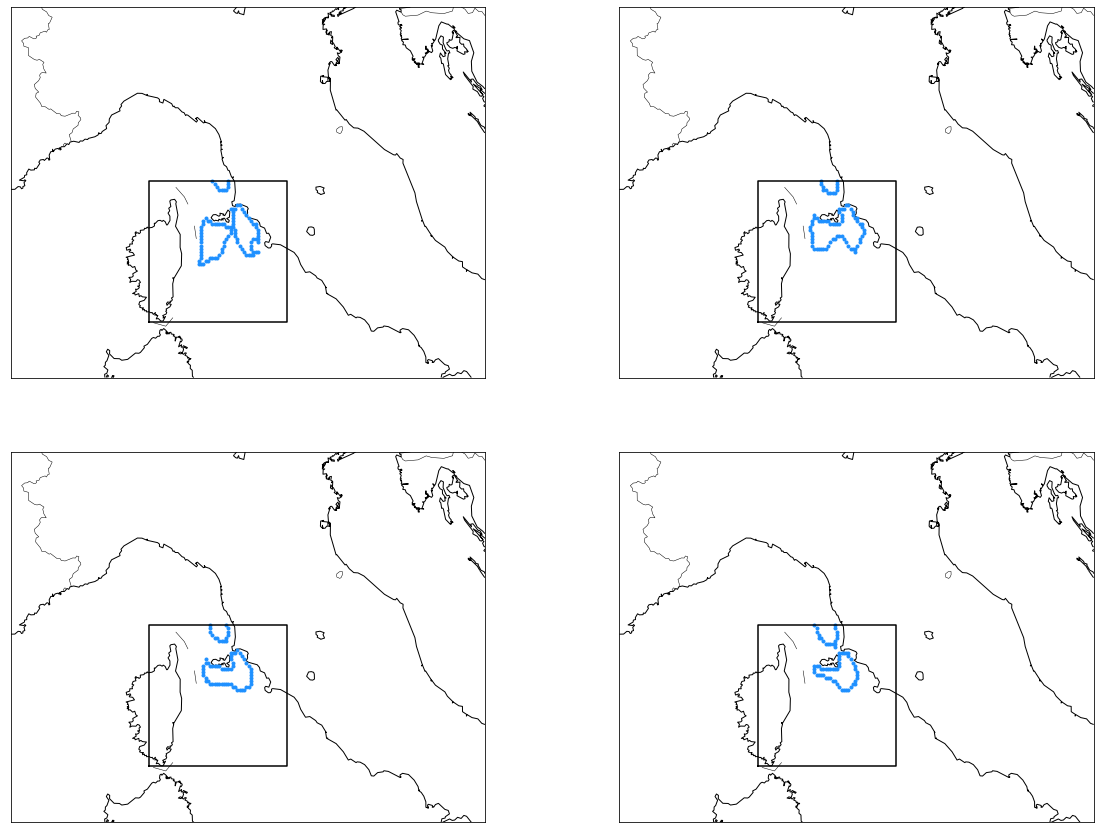

In [8]:
sx, sy = mp(9.42857, 43.11295)
gx, gy = mp(11.300001, 42.270832)
print("START is at ({},{}), GOAL is at ({},{})".format(sx, sy, gx, gy))

#plt.plot(oxland_, oyland_, '.', color='sienna')
#plt.plot(x_obsl_, y_obsl_, '.', color="sienna")
#plt.plot(Cspacex_, Cspacey_, '.c')

fig, ax = plt.subplots(2, 2, figsize=(20, 15))
mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[0][0])
#mp.plot(oxmeteo_[0], oymeteo_[0], ".", color="dodgerblue")
mp.plot(x_obsm_[0], y_obsm_[0], ".", color="dodgerblue")
mp.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[0][1])
#mp.plot(oxmeteo_[1], oymeteo_[1], ".", color="dodgerblue")
mp.plot(x_obsm_[1], y_obsm_[1], ".", color="dodgerblue")
mp.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[1][0])
#mp.plot(oxmeteo_[2], oymeteo_[2], ".", color="dodgerblue")
mp.plot(x_obsm_[2], y_obsm_[2], ".", color="dodgerblue")
mp.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[1][1])
#mp.plot(oxmeteo_[3], oymeteo_[3], ".", color="dodgerblue")
mp.plot(x_obsm_[3], y_obsm_[3], ".", color="dodgerblue")
mp.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

#plt.savefig('contour.png', dpi=300)
plt.show()

## STARTING A*

In [12]:
ox_a_list = [[] for i in range(l)]
oy_a_list = [[] for i in range(l)]
for i in range(l):
    for j, _ in enumerate(x_obsm_[i]):
        ox_a_list[i].append(x_obsm_[i][j])
        oy_a_list[i].append(y_obsm_[i][j])
    for k, _ in enumerate(x_obsl_):
        ox_a_list[i].append(x_obsl_[k])
        oy_a_list[i].append(y_obsl_[k])
len(ox_a_list[0])

240

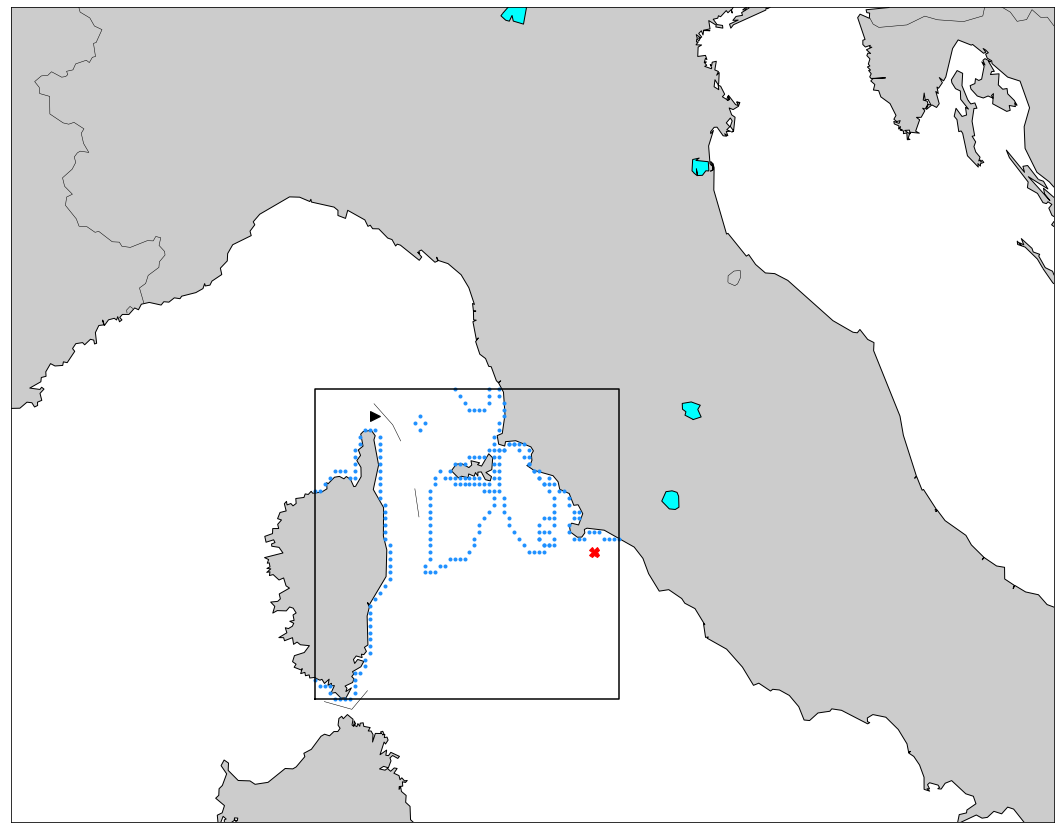

In [13]:
xspace = lons.values[650:712]
yspace = lats.values[268:315]
xs, ys = np.meshgrid(xspace, yspace)
xs_, ys_ = mp(xs, ys)
sx = xspace[12]  # 9.416668
sy = yspace[42]  # 43.104168
gx = xspace[56]   # 11.291668
gy = yspace[22]   # 42.270832

sx_a, sy_a = mp(sx, sy)
gx_a, gy_a = mp(gx, gy)

#ox_a, oy_a = x_obstot_, y_obstot_

plt.figure(1, figsize=(20, 15))
mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i')
plt.plot(sx_a, sy_a, ">k", markersize=10)
plt.plot(gx_a, gy_a, "Xr", markersize=10)
#plt.plot(x_obsl_, y_obsl_, '.', color="sienna")
for j in range(len(ox_a_list[0])):
    plt.plot(ox_a_list[0][j], oy_a_list[0][j], '.', color="dodgerblue")

plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
mp.fillcontinents(lake_color='aqua')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
plt.show()

In [41]:
# grid_size = 2000
# robot_radius = 2  # [m]
# print(round(min(x_obsl_)), round(max(x_obsl_)), round(min(y_obsl_)), round(max(y_obsl_)))
# print(round(min(x_obs_)), round(max(x_obs_)), round(min(y_obs_)), round(max(y_obs_)))
# print(len(x_obsl_), len(y_obsl_))
# print(len(x_obs_), len(y_obs_))

In [14]:
grid_size = 5000
robot_radius = 5000
pot_map3 = [[[0.0 for k in range(len(xspace))] for j in range(len(yspace))] for i in range(l)]

In [15]:
for i in range(l):
    for ix in range(len(xspace)):
        for iy in range(len(yspace)):
            for q, _ in enumerate(ox_a_list[i]):
                d = math.hypot(ox_a_list[i][q] - xs_[iy][ix], oy_a_list[i][q] - ys_[iy][ix])
                if d <= 5000:
                    pot_map3[i][iy][ix] = True
                    break 

In [17]:
from Astar_netcdf import AStarPlanner
import time
show_animation = False
start_time = time.time()
a_star = AStarPlanner(ox_a_list[0], oy_a_list[0], grid_size, robot_radius, x_min, y_min, x_max, y_max)
rx_, ry_ = a_star.planning(sx_a, sy_a, gx_a, gy_a)
print("Computational time is {}".format(time.time() - start_time))

min_x: 282249.730022532°
min_y: 114007.03369052801°
max_x: 564870.0725610546°
max_y: 402247.96147155575°
x_width: 62
y_width: 47


IndexError: list index out of range

<ipython-input-15-79531161cd3b>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mp.pcolor(xs_, ys_, pot_map3[0], cmap='coolwarm')
<ipython-input-15-79531161cd3b>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mp.pcolor(xs_, ys_, pot_map3[1], cmap='coolwarm')
<ipython-input-15-79531161cd3b>:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals

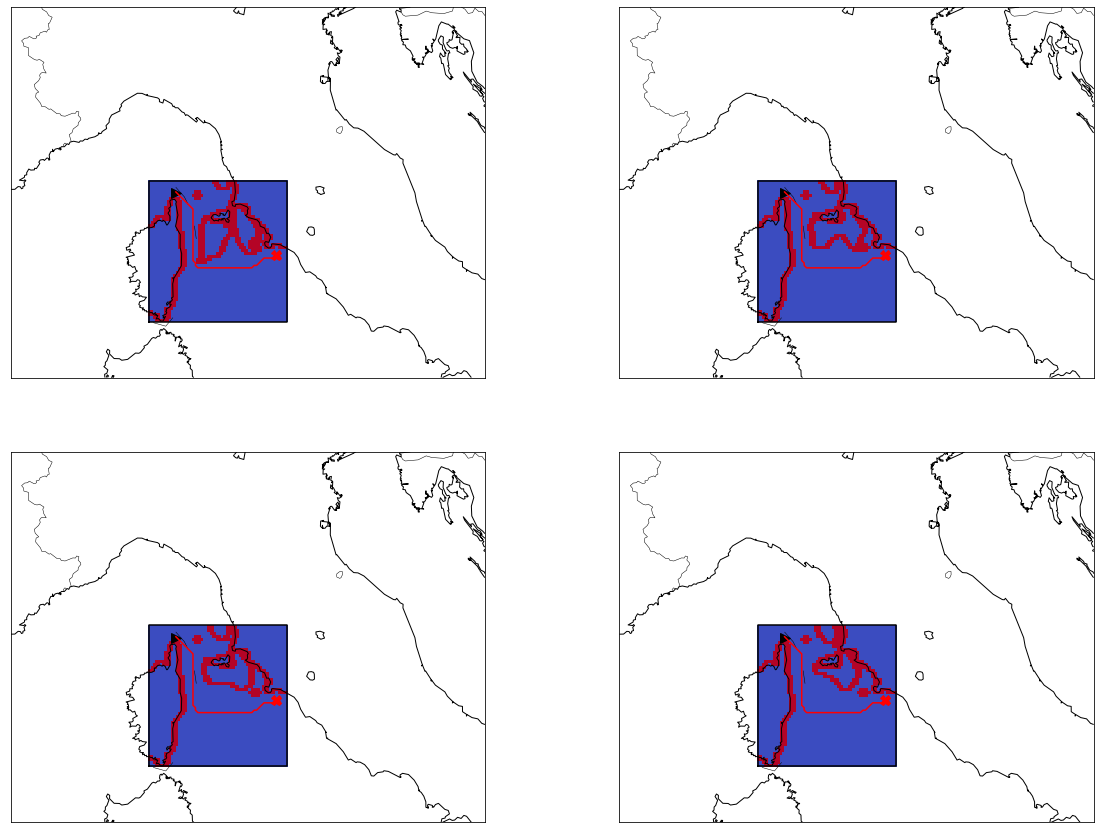

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[0][0])
mp.plot(sx_a, sy_a, ">k", markersize=10)
mp.plot(gx_a, gy_a, "Xr", markersize=10)
mp.pcolor(xs_, ys_, pot_map3[0], cmap='coolwarm')
mp.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
mp.plot(rx_, ry_, '-r')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[0][1])
mp.plot(sx_a, sy_a, ">k", markersize=10)
mp.plot(gx_a, gy_a, "Xr", markersize=10)
mp.pcolor(xs_, ys_, pot_map3[1], cmap='coolwarm')
mp.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
mp.plot(rx_, ry_, '-r')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[1][0])
mp.plot(sx_a, sy_a, ">k", markersize=10)
mp.plot(gx_a, gy_a, "Xr", markersize=10)
mp.pcolor(xs_, ys_, pot_map3[2], cmap='coolwarm')
mp.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
mp.plot(rx_, ry_, '-r')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i', ax=ax[1][1])
mp.plot(sx_a, sy_a, ">k", markersize=10)
mp.plot(gx_a, gy_a, "Xr", markersize=10)
mp.pcolor(xs_, ys_, pot_map3[3], cmap='coolwarm')
mp.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
plt.plot(rx_, ry_, '-r')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

plt.show()

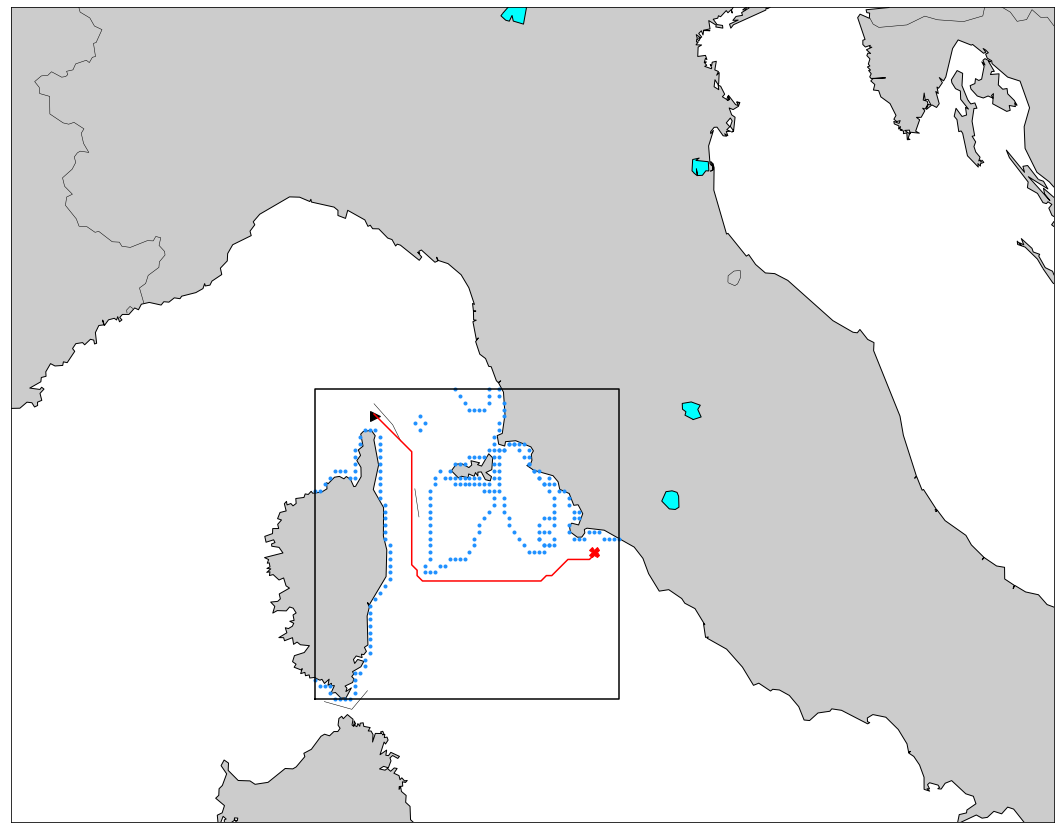

In [27]:
plt.figure(1, figsize=(20, 15))
mp = Basemap(projection='merc',
             llcrnrlon=6.42,  # 4.125, 10,  # -5.42,
             llcrnrlat=40.58,  # 33.1875, 42
             urcrnrlon=15.13,  # 20.291667938, 12
             urcrnrlat=45.5488,  # 45.97916,  42.7488
             resolution='i')
plt.plot(sx_a, sy_a, ">k", markersize=10)
plt.plot(gx_a, gy_a, "Xr", markersize=10)
#plt.plot(x_obsl_, y_obsl_, '.', color="sienna")
for j in range(len(ox_a_list[0])):
    plt.plot(ox_a_list[0][j], oy_a_list[0][j], '.', color="dodgerblue")
plt.plot(rx_, ry_, '-r')
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
mp.fillcontinents(lake_color='aqua')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
plt.savefig('astar.png', dpi=300)
plt.show()